# Principle Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
pima_indians_diabetes_db = pd.read_csv("../probability_and_statistics/diabetes.csv")

In [3]:
pima_indians_diabetes_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima_indians_diabetes_db.shape

(768, 9)

In [5]:
#separate the target outcome from the rest of the features to later use during logistic regression
pima_indians_features = pima_indians_diabetes_db.drop('Outcome', axis = 1)
#store the outcomes in a separate pandas Series
pima_outcome = pima_indians_diabetes_db['Outcome']
pima_indians_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
pima_indians_features.shape

(768, 8)

## PCA using sklearn.decomposition

In [7]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method; make the data centered around the mean and the make the mean 0
scaling.fit(pima_indians_features)
Scaled_data=scaling.transform(pima_indians_features)
 
# Set the n_components=6 to reduce dataset features from 9 ro 6
principle_sk=PCA(n_components=6)
principle_sk.fit(Scaled_data)
transformed_dataset_sk=principle_sk.transform(Scaled_data)

# Check the dimensions of data after PCA
print(transformed_dataset_sk.shape)

(768, 6)


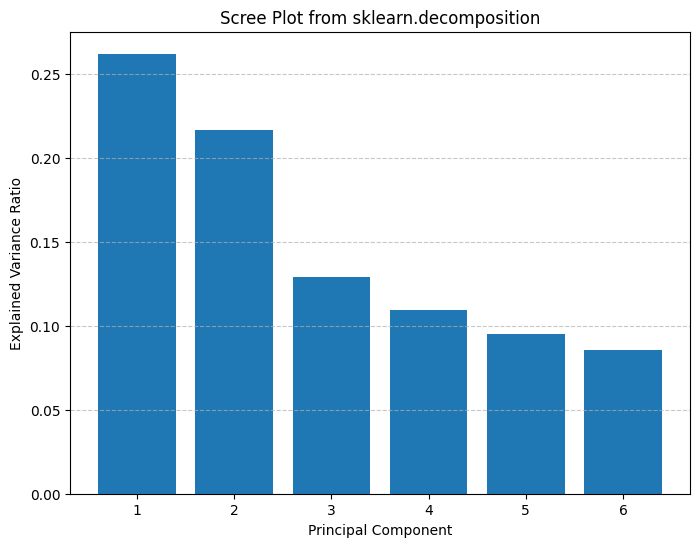

In [74]:
# Calculate the explained variance ratio, which the the percentage of variance captured by each principal component
explained_variance_ratio = principle_sk.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center')
plt.title('Scree Plot from sklearn.decomposition')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How much of the variance of the original dataset does the transformed and reduced data capture using sklearn.decomposition?

In [8]:
variance_captured = sum(principle_sk.explained_variance_ratio_) * 100
print(f"Hence the new reduced dataset captures {variance_captured:.2f}% variance of the original dataset")

Hence the new reduced dataset captures 89.70% variance of the original dataset


## PCA using numpy

In [9]:
class custom_standardizer_np:
    """Custom Standardizer for NumPy arrays.

    This class standardizes the features of a dataset using mean centering and scaling by the standard deviation.
    It provides methods to fit the standardization parameters from the training data and transform new data.

    Attributes:
        mean (ndarray): Mean values of the features computed during fitting.
        standard_dev (ndarray): Standard deviation of the features computed during fitting.
    """
    def __init__(self):
        self.mean = None
        self.standard_dev = None
        
    def fit(self, X):
        """Fit the standardization parameters.

        Args:
            X (ndarray): Input data with features along columns.

        Returns:
            None
        """
        self.mean = np.mean(X, axis=0)
        self.standard_dev = np.std(X, axis = 0)
    
    def transform(self, df):
        """Transform the data using the fitted standardization parameters.

        Args:
            X (ndarray): Input data with features along columns.

        Returns:
            ndarray: Transformed data with standardized features.
        """
        df = (df - self.mean)/self.standard_dev
        return df
    
    
class custom_pca_np:
    """Custom Principal Component Analysis (PCA) for NumPy arrays.

    This class performs PCA on a dataset using the eigendecomposition of the covariance matrix.
    It provides methods to fit the PCA model from the training data and transform new data.

    Attributes:
        n_components (int): Number of principal components to retain.
        components (ndarray): Principal components computed during fitting.
        explained_variance_ratio (ndarray): Ratio of explained variance of each principal component.
        explained_variance (ndarray): Explained variance of each principal component..
    """
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.explained_variance_ratio = None
        self.explained_variance = None
    
    def fit(self, X): 
        """Fit the PCA model from the training data.

        Args:
            X (ndarray): Input data with features along columns.

        Returns:
            None
        """
        cov_matrix = np.cov(X, rowvar=False)
        self.covar = cov_matrix
        
        # Eigendecomposition of covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]
        eigenvalues = eigenvalues[idxs]
        
        self.explained_variance = eigenvalues[:self.n_components]
        
        # Store the first n_components eigenvectors as principal components
        self.components = eigenvectors[:self.n_components]
        self.explained_variance_ratio = self.explained_variance/sum(eigenvalues)
        
        
    def transform(self, X):
        """Transform the data using the fitted PCA model.

        Args:
            X (ndarray): Input data with features along columns.

        Returns:
            ndarray: Transformed data with reduced dimensionality.
        """
        X_transformed = np.dot(X, self.components.T)
        return X_transformed



In [10]:
# Scale data before applying PCA
standardizer = custom_standardizer_np()
# Use fit and transform method; make the data centered around the mean and the make the mean 0
standardizer.fit(pima_indians_features)
scaled_data = standardizer.transform(pima_indians_features)

# Set the n_components=6 to reduce dataset features from 9 ro 6
principle_np = custom_pca_np(n_components=6)
principle_np.fit(scaled_data)
transformed_dataset_np = principle_np.transform(scaled_data)

#check dimension after reduction
print(transformed_dataset_np.shape)

(768, 6)


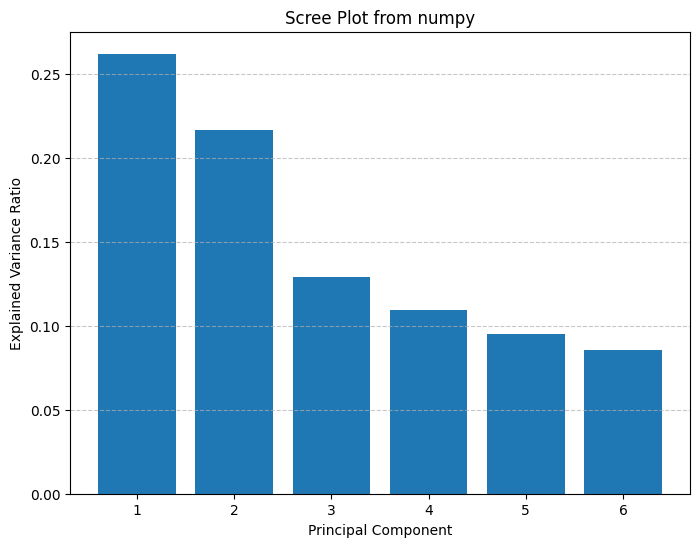

In [78]:
# Calculate the explained variance ratio
explained_variance_ratio_np = principle_np.explained_variance_ratio

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio_np) + 1), explained_variance_ratio_np, align='center')
plt.title('Scree Plot from numpy')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio_np) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How much of the variance of the original dataset does the transformed and reduced data capture using numpy?

In [11]:
variance_captured = sum(principle_np.explained_variance_ratio) * 100
print(f"Hence the new reduced dataset captures {variance_captured:.2f}% variance of the original dataset")

Hence the new reduced dataset captures 89.70% variance of the original dataset


## PCA using pure python

In [12]:
class standardizer_py:
    """Custom Standardizer for Python lists.

    This class standardizes the features of a dataset using mean centering and scaling by the standard deviation.
    It provides methods to fit the standardization parameters from the training data and transform new data.

    Attributes:
        mean (list): Mean values of the features computed during fitting.
        standard_dev (list): Standard deviation of the features computed during fitting.
    """
    def __init__(self):
        self.mean = None
        self.standard_dev = None
    
    def fit(self, X):
        """Fit the standardization parameters.

        Args:
            X (list of lists): Input data with features as inner lists.

        Returns:
            None
        """
        arr = []
        for i in X:
            l = len(X)
            sum = 0 
            for j in X[i]:
                sum += j
            arr.append(sum/l)
        self.mean = arr
        
        arr_std = []
        for i in range(len(X.T)):
            l = len(X)
            sum = 0 
            for j in X.iloc[:, i]:
                sum += (j - arr[i])**2
            arr_std.append(math.sqrt(sum/l))
        self.standard_dev = arr_std
    
    def transform(self, df):
        """Transform the data using the fitted standardization parameters.

        Args:
            df (list of lists): Input data with features as inner lists.

        Returns:
            list of lists: Transformed data with standardized features.
        """
        new_df = []
        for i in range(len(df.T)):
            row = []
            for j in df.iloc[:, i]:
                row.append((j-self.mean[i])/self.standard_dev[i])
            new_df.append(row)
            transposed_df = [list(row) for row in zip(*new_df)]
        return transposed_df
    

class pca_py:
    """Custom Principal Component Analysis (PCA) for Python lists.

    This class performs PCA on a dataset using the eigendecomposition of the covariance matrix.
    It provides methods to fit the PCA model from the training data and transform new data.

    Attributes:
        n_components (int): Number of principal components to retain.
        components (list of lists): Principal components computed during fitting.
        explained_variance_ratio (list): Ratio of explained variance of each principal component.
        explained_variance (list): Explained variance of each principal component.
    """
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.explained_variance_ratio = None
        self.explained_variance = None
    
    # Calculate covariance matrix
    def _cov_matrix(self, centered):
        """Calculate the covariance matrix.

        Args:
            centered (list of lists): Mean-centered input data.

        Returns:
            list of lists: Covariance matrix.
        """
        # Number of rows
        n = len(centered)

        # Number of columns
        m = len(centered[0])
        cov_matrix = [[0] * m for _ in range(m)]
        for i in range(m):
            for j in range(m):
                cov_matrix[i][j] = sum(centered[k][i] * centered[k][j] for k in range(n)) / (n - 1)

        return cov_matrix
    
    def fit(self, X):
        """Fit the PCA model from the training data.

        Args:
            X (list of lists): Input data with features as inner lists.

        Returns:
            None
        """
        cov_matrix = self._cov_matrix(X)
        cov_matrix = np.array(cov_matrix)
        # Eigendecomposition of covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]
        eigenvalues = eigenvalues[idxs]
        self.explained_variance = eigenvalues[:self.n_components]
        
        # Store the first n_components eigenvectors as principal components
        self.components = eigenvectors[:self.n_components]
        self.explained_variance_ratio = self.explained_variance/sum(eigenvalues)
        
    def transform(self, X):
        """Transform the data using the fitted PCA model.

        Args:
            X (list of lists): Input data with features as inner lists.

        Returns:
            list of lists: Transformed data with reduced dimensionality.
        """
        X_transformed = np.dot(X, self.components.T)
        return X_transformed
        

In [13]:
# Scale data before applying PCA
standardizer = custom_standardizer_np()
# Use fit and transform method; make the data centered around the mean and the make the mean 0
standardizer.fit(pima_indians_features)
scaled_data = standardizer.transform(pima_indians_features)

# Set the n_components=6 to reduce dataset features from 9 ro 6
principle_np = custom_pca_np(n_components=6)
principle_np.fit(scaled_data)
transformed_dataset_np = principle_np.transform(scaled_data)

#check dimension after reduction
print(transformed_dataset_np.shape)

(768, 6)


In [14]:
standard_py = standardizer_py()
standard_py.fit(pima_indians_features)
scaled = standard_py.transform(pima_indians_features)

In [15]:
principle_py = pca_py(6)
principle_py.fit(scaled)
transformed_dataset_py = principle_py.transform(scaled)

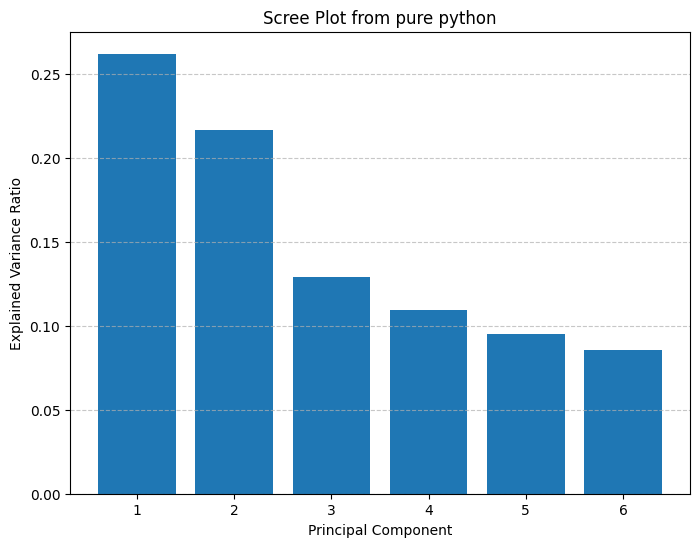

In [84]:
# Calculate the explained variance ratio
explained_variance_ratio_np = principle_py.explained_variance_ratio

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio_np) + 1), explained_variance_ratio_np, align='center')
plt.title('Scree Plot from pure python')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio_np) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How much of the variance of the original dataset does the transformed and reduced data capture using pure python?

In [16]:
variance_captured = sum(principle_py.explained_variance_ratio) * 100
print(f"Hence the new reduced dataset captures {variance_captured:.2f}% variance of the original dataset")

Hence the new reduced dataset captures 89.70% variance of the original dataset


## Train a logistic regression model using the non-reduced dataset and dimentionality reduced dataset

In [17]:
def log_regression(df, target):
    X = df.drop(target, axis=1)  # Features
    y = df[target]  # Target variable

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Splitting the dataset into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Initializing the Logistic Regression model
    model = LogisticRegression()

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [21]:
print(f"Accuracy of logistic regression for non-reduced dataset: {log_regression(pima_indians_diabetes_db, 'Outcome'):.3f}")

Accuracy of logistic regression for non-reduced dataset: 0.736


In [18]:
df_sk = pd.DataFrame(transformed_dataset_sk)
df_sk = pd.concat([df_sk, pima_outcome], axis = 1)
print(f"Accuracy of logistic regression for dataset reduced to 6 features by performing PCA using sklearn.decomposition: {log_regression(df_sk, 'Outcome'):.3f}")

Accuracy of logistic regression for dataset reduced to 6 features by performing PCA using sklearn.decomposition: 0.736


In [19]:
df_np = pd.DataFrame(transformed_dataset_np)
df_np = pd.concat([df_np, pima_outcome], axis = 1)
print(f"Accuracy of logistic regression for dataset reduced to 6 features by performing PCA using numpy: {log_regression(df_np, 'Outcome'):.3f}")

Accuracy of logistic regression for dataset reduced to 6 features by performing PCA using numpy: 0.736


In [20]:
df_py = pd.DataFrame(transformed_dataset_py)
df_py = pd.concat([df_py, pima_outcome], axis = 1)
print(f"Accuracy of logistic regression for dataset reduced to 6 features by performing PCA using python: {log_regression(df_py, 'Outcome'):.3f}")

Accuracy of logistic regression for dataset reduced to 6 features by performing PCA using python: 0.736


### Observation
<p>
    The logistic model trained using the reduces dataset performed the same as teh logistic model trained using the non-reduced
    dataset
</p>

#### Let's train the model using datasets reduced to even lower dimensions

In [22]:
# Set the n_components=5 to reduce dataset features from 9 to 5
principle_sk_five=PCA(n_components=5)
principle_sk_five.fit(Scaled_data)
transformed_dataset_sk_five=principle_sk_five.transform(Scaled_data)

# Check the dimensions of data after PCA
print(transformed_dataset_sk_five.shape)

(768, 5)


In [24]:
variance_captured_five = sum(principle_sk_five.explained_variance_ratio_) * 100
print(f"Hence the new reduced dataset captures {variance_captured_five:.2f}% variance of the original dataset")

Hence the new reduced dataset captures 81.16% variance of the original dataset


In [25]:
df_sk_five = pd.DataFrame(transformed_dataset_sk_five)
df_sk_five = pd.concat([df_sk_five, pima_outcome], axis = 1)
print(f"Accuracy of logistic regression for dataset reduced to 5 features by performing PCA using sklearn.decomposition: {log_regression(df_sk_five, 'Outcome'):.3f}")

Accuracy of logistic regression for dataset reduced to 5 features by performing PCA using sklearn.decomposition: 0.710


### Reducing the features to capture about 90% of the variance seems to have no effect on the accuracy of logisitic regression model. Reducing the variance captured to 81% (5 PCs in our case) however had the effect of reducing overall accuracy of the logistic regression model.